### Keras - MNIST MLP

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # to avoid warning messages

import tensorflow as tf
import matplotlib.pyplot as plt

def Analyze_training(h):
# summarize history for accuracy
# history.history.keys() -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

    Modify layers size and epochs
    Which accuracy can you obtain?

In [2]:
# layers structure
batch_size = 128
epochs = 10
hlayer1 = 64
hlayer2 = 64

    Prepare Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

#####    Definition of a Simple [784:64:64:10] Network

In [5]:
model = Sequential()
model.add(Dense(hlayer1, activation='relu', input_shape=(784,)))
model.add(Dense(hlayer2, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


    Method Fit Trains Network !

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3618 - accuracy: 0.8976 - val_loss: 0.2038 - val_accuracy: 0.9415
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1696 - accuracy: 0.9501 - val_loss: 0.1433 - val_accuracy: 0.9579
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1240 - accuracy: 0.9635 - val_loss: 0.1204 - val_accuracy: 0.9633
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0976 - accuracy: 0.9712 - val_loss: 0.1092 - val_accuracy: 0.9683
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0815 - accuracy: 0.9751 - val_loss: 0.0905 - val_accuracy: 0.9724
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0687 - accuracy: 0.9793 - val_loss: 0.0899 - val_accuracy: 0.9726
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0590 - accuracy: 0.9819 - val_loss: 0.0872 - val_accuracy: 0.9747
Epoch 

Test loss: 0.09188078343868256
Test accuracy: 0.9740999937057495
Train accuracy: 0.9883833527565002


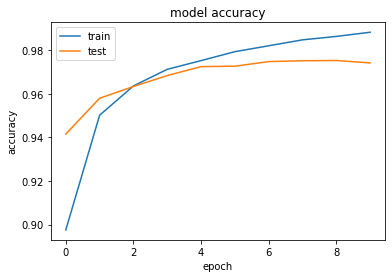

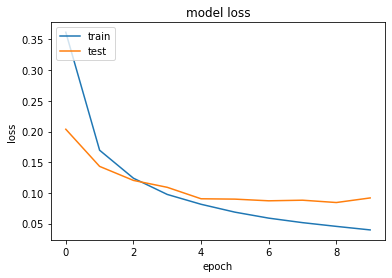

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)